In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from env import get_db_url
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

1.  A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

<BarContainer object of 9 artists>

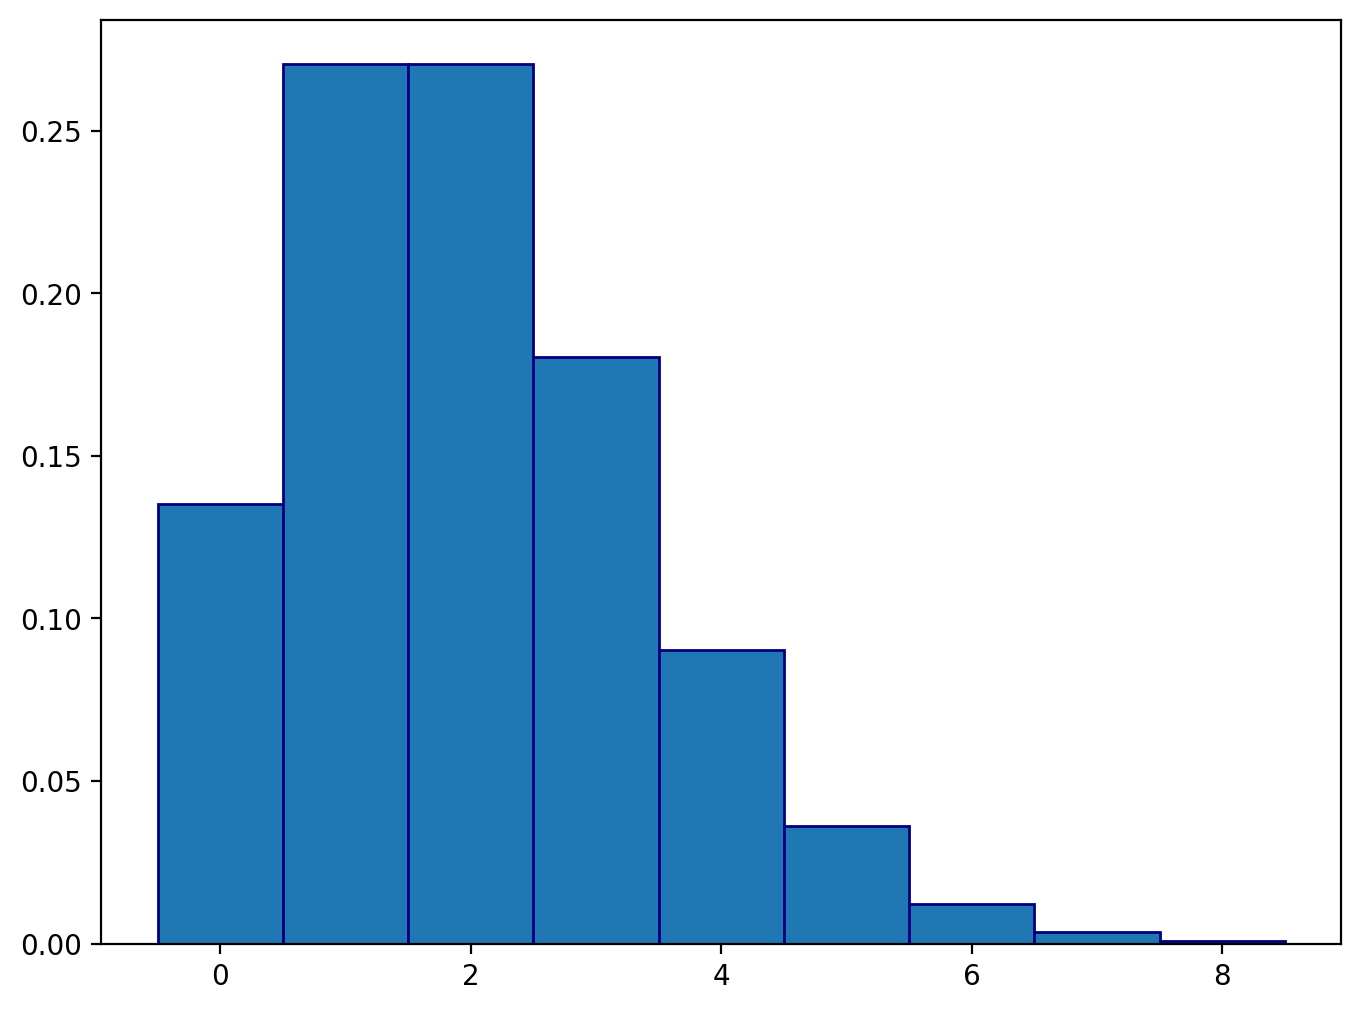

In [13]:
x = range(9)
q1 = stats.poisson(2)
q1_y = q1.pmf(x)
plt.figure(figsize=(8,6))
plt.bar(x,q1_y,width=1,edgecolor='navy')

##   What is the probability that no cars drive up in the noon hour?

In [21]:
q1.pmf(0)

0.1353352832366127

In [25]:
(q1.rvs(10**5) == 0).mean()

0.1329

## What is the probability that 3 or more cars come through the drive through?
    

In [17]:
q1.sf(3) + q1.pmf(3)

0.3233235838169365

## How likely is it that the drive through gets at least 1 car?


In [49]:
q1.sf(0)

0.8646647167633873

2.  Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

In [19]:
q2 = stats.norm(3.0,.3)

## What grade point average is required to be in the top 5% of the graduating class?

In [31]:
q2.ppf(.95)

3.4934560880854417

## What GPA constitutes the bottom 15% of the class?

In [32]:
q2.ppf(.15)

2.689069983151863

An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. 

In [50]:
third_decile = q2.ppf([.2,.3])
third_decile

array([2.74751363, 2.84267985])

Would a student with a 2.8 grade point average qualify for this scholarship?


In [36]:
2.8 <= third_decile

True

## If I have a GPA of 3.5, what percentile am I in?

In [39]:
f"You're in the {round(q2.cdf(3.5),2) * 100} percentile."

"You're in the 95.0 percentile."

## 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [51]:
q3 = stats.binom(4326,.02)
q3.sf(96)

0.13975823631416445

## 4.  You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

In [40]:
q4 = stats.binom(100,.01)

## What is the probability that at least one of your first 60 answers is correct?

In [48]:

q4 = stats.binom(60,.01)
q4.sf(0)

0.45284335760923855

## 5.  The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? 

In [56]:
cohorts = round(.9 * 3 * 22)
q4 = stats.binom(cohorts,.03 )
q4.sf(0)

0.8342199288437352

How likely is it that it goes two days without getting cleaned up?

In [58]:
cohorts = round(.9 * 3 * 22)
q4 = stats.binom(cohorts * 2,.03 )
q4.cdf(0)

0.02748303199257623

 All week?

In [59]:
cohorts = round(.9 * 3 * 22)
q4 = stats.binom(cohorts * 7,.03 )
q4.cdf(0)

3.441329456988011e-06

## 6.  You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [4]:
mean = 30 # 15 * 2 = 30 mins
stdd = 6 #3 * 2 = 30 mins
q6_gen = stats.norm(mean,stdd)
max_time_allowed = 60 - 15 - 2 - 10
q6_gen.cdf(max_time_allowed)

0.6914624612740131

    
7.  Connect to the `employees` database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [22]:
db_url = get_db_url('employees')
query = '''
SELECT salary FROM salaries
JOIN dept_emp USING(emp_no)
WHERE dept_emp.to_date > CURDATE()
'''
salaries = pd.read_sql(query,db_url).salary
salaries

0          60117
1          62102
2          66074
3          66596
4          66961
           ...  
2524732    63707
2524733    67043
2524734    70745
2524735    74327
2524736    77303
Name: salary, Length: 2524737, dtype: int64

In [12]:
q7_mean = round(salaries.mean(),2)
q7_std = round(salaries.std(),2)
q7_gen = stats.norm(q7_mean,q7_std)

    
    1.  What percent of employees earn less than 60,000?

In [25]:
#using normal distribution
q7p1_norm = q7_gen.cdf(59_999.99) * 100
q7p1_actual = salaries[salaries < 60000].count() / salaries.count() * 100
f'actual: {q7p1_actual:.5f}%, estimated: {q7p1_norm:.5f}%.'

'actual: 46.15550%, estimated: 39.98971%.'

    2.  What percent of employees earn more than 95,000?

In [27]:
q7p2_norm = q7_gen.sf(95_000) * 100
q7p2_actual = salaries[salaries > 95000].count() / salaries.count() * 100
f'actual: {q7p2_actual:.5f}%, estimated: {q7p2_norm:.5f}%.'

'actual: 5.62011%, estimated: 3.51303%.'

    3.  What percent of employees earn between 65,000 and 80,000?

In [43]:
q7p3_norm = (q7_gen.sf(64_999.99) - q7_gen.sf(79_999.99)) * 100
q7p3_actual = salaries[(salaries >= 65_000) & (salaries <= 80_000)].count() / salaries.count() * 100
f'estimated value: {q7p3_norm:.5f}%, actual value: {q7p3_actual:.5f}%'

'estimated value: 30.62651%, actual value: 24.81684%'

4.  What do the top 5% of employees make?

In [50]:
q7p4_norm = q7_gen.isf(.0499999999999)
q7p4_actual = salaries[salaries.rank(pct=True) >= .95].max()
f'estimated value: ${q7p4_norm:1.2f}, actual value: ${q7p4_actual:1.2f}'

'estimated value: $92195.49, actual value: $158220.00'